**<h1><center>PROBLEMA DAS N-RAINHAS</center></h1>**
**<center>Camila Stephany Silva de Abreu</center>**
**<center>Roberta Regina Pereira</center>**

**"DADO UM TABULEIRO DE XADREZ REGULAR NxN E COM N RAINHAS, O ALGORITMO DEVE ENCONTRAR A MELHOR SOLUÇÃO PARA POSICIONAR AS RAINHAS DE MODO  QUE ELAS NÃO SE COLOQUEM EM XEQUE."**

**REPRESENTAÇÃO DA POPULAÇÃO**
- fenótipo (f): uma dada configuração do tabuleiro com N rainhas;  
- genótipo (g) ou cromossomo = permutação dos inteiros 1,2,3 … N; isto é: g ={i<sub>1</sub> , i<sub>2</sub> , i<sub>3</sub> …, i<sub>N</sub> } denotando uma configuração. k-ésima coluna contém uma rainha posicionada na i<sub>k</sub>-ésima linha.   

**FUNÇÃO DE APTIDÃO**  
qualidade de uma solução candidata q(f)
- Número de xeques entre pares de rainhas

**OPERADORES DE VARIAÇÃO**
- crossover: cria duas novas soluções candidatas (descendentes) a partir da combinação dos genes de dois cromossomos pais.
- mutação: seleciona de forma aleatória duas posições em um cromossomo (permutação) e troca os valores destas posições.

**MECANISMO DE SELEÇÃO**
- Seleção dos Pais: escolha aleatoriamente cinco indivíduos na população e selecione os dois melhores para efetuar crossover.
- Seleção dos Sobreviventes: ordene (ranqueie) todos os indivíduos (população original mais 2 descendentes) e elimine os 2 piores a cada geração.

**CONDIÇÃO DE TÉRMINO**  
- Termine quando a solução ótima for encontrada (q(f) = 0) ou quando um número máximo de gerações tiver sido alcançado (=100)

In [24]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

Função que inicializa a população:
- _mu -> número de indivíduos (configurações diferentes do tabuleiro)
- n -> número de rainhas inicializadas de maneira aleatória

In [25]:
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(1,n+1), n))
    return population

Função de aptidão: retorna o número de xeques para uma dada configuração de rainhas

In [26]:
def fitness_nq(solution): 
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

#Retorna a quantidade de xeques de toda a população
def fitness_pop(population): 
    return [fitness_nq(each_solution) for each_solution in population]

Operadores de variação: 

- Cruzamento dos pais: 
  - Cria dois novos descendentes a partir dos genes do pai através da método de crossover denominado como Cut and Crossfill;
  - Neste método é escolhido um ponto aleatório para gerar um corte e os filhos são preenchidos com os segmentos dos pais;
  - A taxa de cruzamento define se os filhos serão gerados como cópias dos pais ou por meio do cruzamento deles.  
  
- Mutação nos genes dos filhos: 
  - A função mutação seleciona aleatoriamente duas posições em um cromossomo e troca seus valores, assim, garantindo que haja maior diversidade genética na população e a introdução de novos elementos. Isso garante que o algoritmo não convirja rapidamente para mínimos locais e assegura uma varredura por todo o espaço de estados;
  - A taxa de mutação define se os genes serão trocados ou não.

In [27]:
def crossover(parents, rate:int = 1):
    N = len(parents[0])
    offspring = np.zeros(shape=(2,N), dtype=int)
    
    n = rd.uniform(0,1)
    if n > rate:
        offspring[0] = parents[0]
        offspring[1] = parents[1]
        return offspring.tolist()

    pos = rd.randint(0,N)   
    offspring[0][0:pos] = parents[0][0:pos]
    offspring[1][0:pos] = parents[1][0:pos]
    
    s1 = s2 = pos
     
    for i in range(N):
        check1 = 0;
        check2 = 0;
        for j in range(pos):
            if parents[1][i] == offspring[0][j]:
                check1 = 1 
            if parents[0][i] == offspring[1][j]:
                check2 = 1 

        if check1 == 0:
            offspring[0][s1] = parents[1][i]
            s1 = s1 + 1
        if check2 == 0:
            offspring[1][s2] = parents[0][i]
            s2 = s2 + 1

    return offspring.tolist()

def mutation(offspring, rate):
    N = len(offspring[0])
   
    #Mutation - offspring 1    
    for i in range(N):
        n = rd.uniform(0,1)
        gen1 = rd.randint(0, N-1)
        gen2 = rd.randint(0, N-1)
        if n < rate:                  #Se o número aletório gerado for menor que a taxa de mutação, então ocorre a mutação
            offspring[0][gen1], offspring[0][gen2] = offspring[0][gen2], offspring[0][gen1] #Troca de genes
                
    #Mutation - offspring 2
    for i in range(N):
        n = rd.uniform(0,1)
        gen1 = rd.randint(0, N-1)
        gen2 = rd.randint(0, N-1)
        if n < rate:
            offspring[1][gen1], offspring[1][gen2] = offspring[1][gen2], offspring[1][gen1] 
                               
    return offspring

Mecanismos de seleção: 

- Seleção dos pais: escolhe aleatoriamente 5 individuos da população e seleciona os dois melhores (possui menor número de xeques)
- Substituição da população: ordenar toda a população de acordo com o número de xeques e eliminar os dois piores (possui maior número de xeques)

In [28]:
def parents_select(population):
    parents = []
    individuals = rd.sample(population, 5)         
    ind_fitness = fitness_pop(population)
    candidates = list(zip(ind_fitness,individuals)) 
    candidates.sort()                               
    parents.append(candidates[0][1])
    parents.append(candidates[1][1])
    return parents
    
def replacement(population, offspring):
    survivers = []
    ind_fitness = [fitness_nq(each_solution) for each_solution in population]
    candidates = list(zip(ind_fitness,population)) 
    candidates.sort(reverse=True)                  
    del(candidates[0:2])                           
    for i in range(len(candidates)):
        survivers.append(candidates[i][1])
    return survivers+offspring

Avaliação da população
- Calcula o número médio de xeques de uma população e o xeque ótimo;
- Retorna a melhor configuração de rainhas (genótipo) que tem o menor número de xeques;
- Gera os gráficos para comparação dos xeques médio e ótimo de cada geração

In [29]:
#Avalia a população retornando o fitness de todos os indiviuos, o melhor fitness e o fitness médio
def evalution(population):
    fitness = fitness_pop(population)
    best = min(fitness)
    mean = np.mean(fitness)
    return (best, round(mean,2))

#Retorna o genótipo com o melhor fitness
def best_genotype(population):
    fitness = fitness_pop(population)
    candidates = list(zip(fitness,population)) 
    candidates.sort()   
    bestGenotype = candidates[0][1]
    return bestGenotype

#Gera o gráfico do fitness ótimo e fitness médio por geração
def graphic(best_points, mean_points, x_points):
    n = len(x_points)
    fig = plt.figure(figsize=(0.09*n, 0.05*n))
    plt.xlabel("Gerações", size=14)
    plt.ylabel("Fitness", size=14)
    plt.title("Fitness x Geração", size=16)
    plt.xlim(left=0, right=max(x_points)+1)
    #Best fitness
    x = np.array(x_points)
    y = np.array(best_points)
    plt.scatter(x, y,color = 'green', label='Fitness ótimo')
    #Mean fitness
    x = np.array(x_points)
    y = np.array(mean_points)
    plt.scatter(x, y,color = 'blue',label='Fitness médio')
    
    plt.legend()
    plt.show()

#Gera o tabuleiro com o melhor genótipo
def draw_board(n, genotype):
    genotype = list(map(lambda x: x-0.5, genotype))
    x = np.arange(0.5,n,1)
    fig = plt.figure(figsize=(0.3*n, 0.3*n))
    ax = fig.gca()
   
    ax.set_xticks(np.arange(n+1, 0, -1))
    ax.set_yticks(np.arange(n+1, 0, -1))
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=n, top=0)

    plt.scatter(x, genotype, s=80, color='red')
    plt.grid(color = 'black',linewidth = 2)
    plt.show()

Loop principal: executa o programa até que a condição de término seja atingida
- Inicializa a população
- Avalia a população
- Seleciona os pais
- Realiza o cruzamento dos pais
- Realiza a mutação nos genes dos filhos
- Seleciona os individuos para a nova geração

In [30]:
def main_loop(populationSize, queens, generationMax, mutationRate, crossoverRate):
    #Inicializa a população
    pop = init_population(populationSize, queens)
    i_geracoes = 0
    bestFitness, meanFitness = evalution(pop)
    gen_best_fitness = []
    gen_mean_fitness = []
    generations = []
    
    gen_best_fitness.append(bestFitness)
    gen_mean_fitness.append(meanFitness)
    generations.append(i_geracoes)   
    
    #Main Loop
    while i_geracoes < generationMax and bestFitness != 0:
        subset_parents = parents_select(pop) 
        offspring = crossover(subset_parents, crossoverRate) 
        offspring_new = mutation(offspring, mutationRate) 
        pop = replacement(pop,offspring_new) 
        bestFitness, meanFitness = evalution(pop)
        
        i_geracoes += 1

        generations.append(i_geracoes)
        gen_best_fitness.append(bestFitness)
        gen_mean_fitness.append(meanFitness)
        
    bestGenotype = best_genotype(pop)
    
    print("SOLUÇÃO ÓTIMA -", queens, "RAINHAS\n"
          "\nTamanho da população:", populationSize, "indivíduos" 
          "\nGeração:", i_geracoes,
          "\nGenótipo ótimo:", bestGenotype, 
          "\nFitness médio:", meanFitness,
          "\nFitness ótimo:", bestFitness)
     
    plot = graphic(gen_best_fitness, gen_mean_fitness, generations)
    draw_board(queens, bestGenotype)
        
    return (populationSize, queens, i_geracoes,meanFitness, bestFitness)

**O programa será executado com tabuleiros de tamanho: 8, 20 e 50**

SOLUÇÃO ÓTIMA - 8 RAINHAS

Tamanho da população: 20 indivíduos
Geração: 100 
Genótipo ótimo: [2, 5, 3, 8, 7, 4, 6, 1] 
Fitness médio: 4.4 
Fitness ótimo: 2


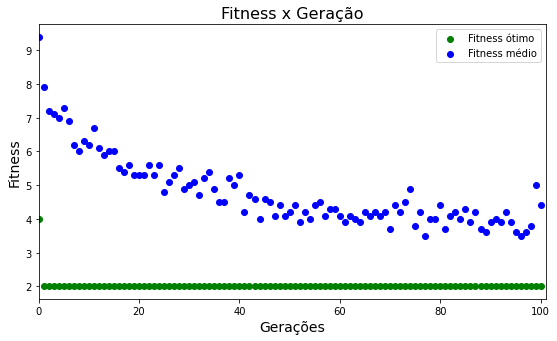

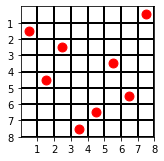

In [31]:
eightQueens = main_loop(20,8,100,0.8,1)

SOLUÇÃO ÓTIMA - 20 RAINHAS

Tamanho da população: 50 indivíduos
Geração: 100 
Genótipo ótimo: [4, 10, 3, 17, 1, 8, 19, 14, 15, 9, 18, 11, 7, 2, 6, 20, 12, 13, 16, 5] 
Fitness médio: 16.24 
Fitness ótimo: 12


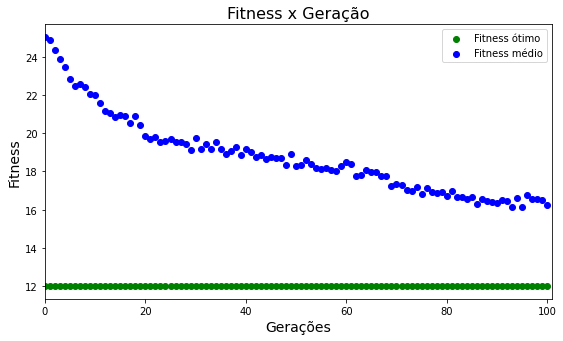

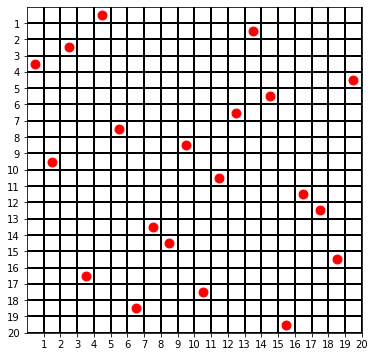

In [32]:
twentyQueens = main_loop(50,20,100,0.8,1)

SOLUÇÃO ÓTIMA - 50 RAINHAS

Tamanho da população: 100 indivíduos
Geração: 100 
Genótipo ótimo: [29, 39, 28, 8, 49, 30, 32, 17, 33, 14, 12, 15, 43, 18, 13, 34, 16, 50, 27, 45, 40, 4, 25, 5, 42, 47, 23, 41, 35, 10, 21, 9, 38, 19, 31, 1, 20, 11, 22, 7, 3, 36, 24, 46, 44, 2, 48, 6, 26, 37] 
Fitness médio: 53.02 
Fitness ótimo: 40


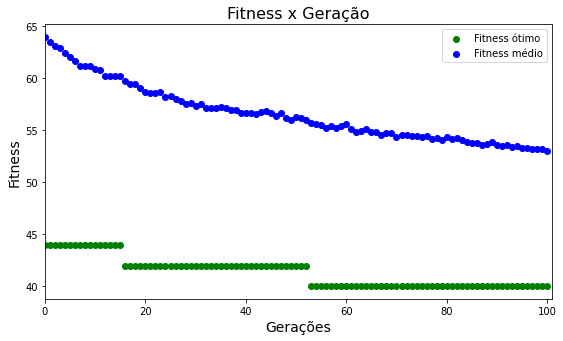

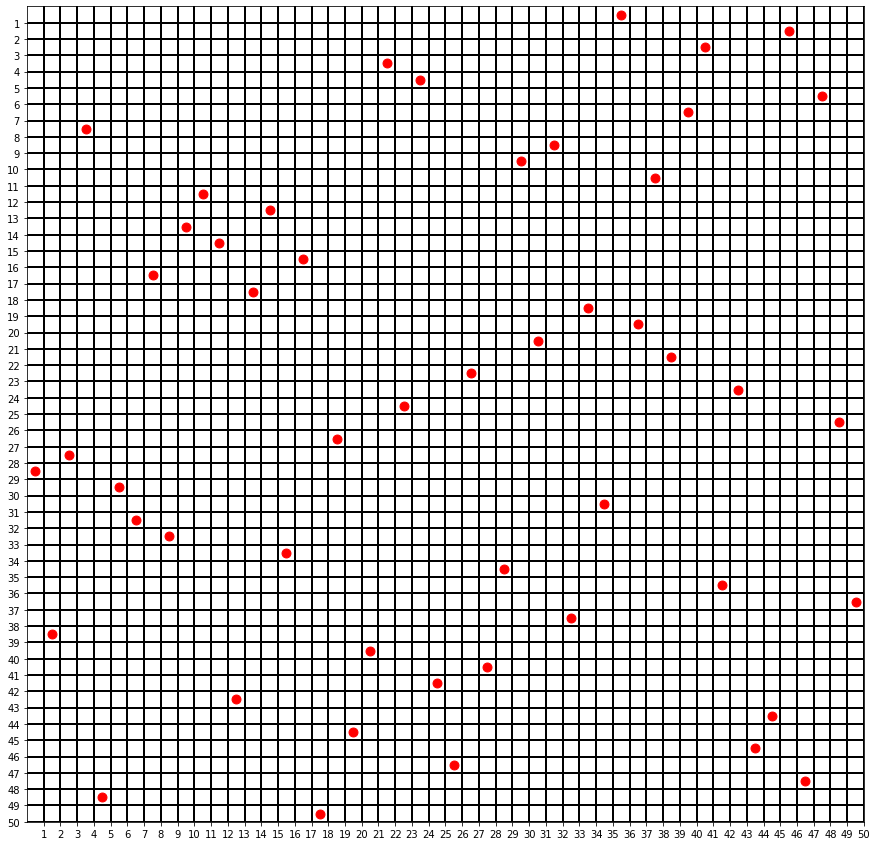

In [33]:
fiftyQueens = main_loop(100,50,100,0.8,1)

In [34]:
results = [eightQueens, twentyQueens, fiftyQueens]

#Tabela para comparação dos dados
df = pd.DataFrame(results, columns=['Population Size', '# Queens', 'Generation', 'Mean Fitness', 'Best Fitness'])
df = df.style.hide_index()
pd.set_option('display.precision',2)

**Comparação entre diferentes tamanho da população**

In [35]:
display(df)

Population Size,# Queens,Generation,Mean Fitness,Best Fitness
20,8,100,4.40,2
50,20,100,16.24,12
100,50,100,53.02,40


SOLUÇÃO ÓTIMA - 15 RAINHAS

Tamanho da população: 100 indivíduos
Geração: 100 
Genótipo ótimo: [3, 8, 2, 9, 4, 10, 1, 15, 12, 6, 7, 13, 11, 14, 5] 
Fitness médio: 12.76 
Fitness ótimo: 6


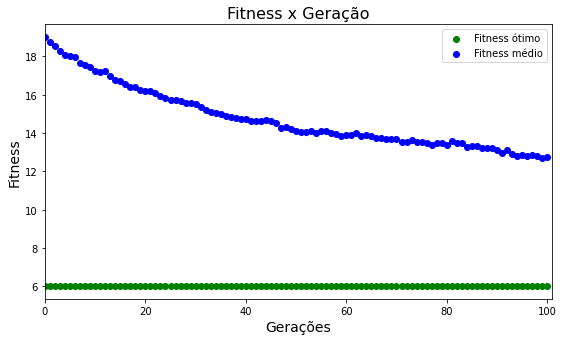

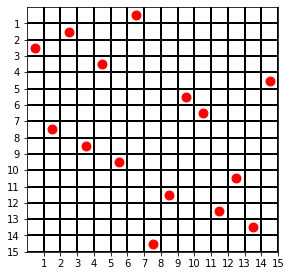

(100, 15, 100, 12.76, 6)

In [36]:
# Sua vez

board = int(input("Tamanho do tabuleiro:"))
population = int(input("Tamanho da população:"))
max_generations = int(input("Quantidade máxima de gerações:"))
rate_mutation = float(input("Taxa de mutação:"))
rate_crossover = float(input("Taxa de cruzamento:"))
main_loop(population,board,max_generations,rate_mutation,rate_crossover)